# Analyzing IMDb Data


### Let's start with basic level

In [1]:
# importing the necessary libraries

import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline

### Reading the IMDb file and store it into a variable called "movies"

In [4]:
movies = pd.read_csv(r"C:\Users\Amit\Desktop\random/imdb_clean.csv")
movies.head()

,title,release_year,runtime,genre,rating,gross(M)
0,The Shawshank Redemption,1994,142 min,Drama,9.3,28.34
1,The Godfather,1972,175 min,Crime,9.2,134.97
2,The Godfather,1972,175 min,Drama,9.2,134.97
3,The Dark Knight,2008,152 min,Action,9.0,534.86
4,The Dark Knight,2008,152 min,Crime,9.0,534.86


### Checking the shape of the dataset

In [5]:
movies.shape

(2532, 6)

### Checking the data types

In [6]:
movies.dtypes

title            object
release_year      int64
runtime          object
genre            object
rating          float64
gross(M)        float64
dtype: object

### Calculate the average movie duration

In [14]:
# str.extract('(\d+)') method used to extract the numeric digits.
movies["duration"] = movies["runtime"].str.extract('(\d+)').astype(int)
print(movies["duration"])

0       142
1       175
2       175
3       152
4       152
       ... 
2527     71
2528     71
2529    113
2530    113
2531    113
Name: duration, Length: 2532, dtype: int32


In [16]:
movies["duration"].mean()

124.20971563981043

### Sort the DataFrame by duration to find out the shortest and longest movies

In [60]:
display_cols = ["title","duration"]
movies_sorted = movies.sort_values("duration",ascending=False)

movies_uni_dur = movies_sorted['duration'].unique()
movies_uni_title = movies_sorted['title'].unique()

# Checking the length of my array

print(f"The length of movies_uni_title array is : {len(movies_uni_title)}")
print("The length of movies_uni_dur array is : " ,len(movies_uni_dur))

print("------------------------")
table = [movies_uni_title , movies_uni_dur]

table_data = pd.Series(table , index= ["Title" , "Duration"])
print(table_data)
print("------------------------")

print("Longest")
print(movies_sorted[display_cols].iloc[:10])

print("------------------------")
print("Shortest")
print(movies_sorted[display_cols].iloc[-10:])

The length of movies_uni_title array is : 994
The length of movies_uni_dur array is :  142
------------------------
Title       [Gangs of Wasseypur, Hamlet, Zack Snyder's Jus...
Duration    [321, 242, 238, 229, 224, 220, 218, 212, 209, ...
dtype: object
------------------------
Longest
                             title  duration
462             Gangs of Wasseypur       321
463             Gangs of Wasseypur       321
464             Gangs of Wasseypur       321
2221                        Hamlet       242
863   Zack Snyder's Justice League       242
862   Zack Snyder's Justice League       242
864   Zack Snyder's Justice League       242
432             Gone with the Wind       238
433             Gone with the Wind       238
431             Gone with the Wind       238
------------------------
Shortest
                            title  duration
1076  The Cabinet of Dr. Caligari        67
1077  The Cabinet of Dr. Caligari        67
1482          Battleship Potemkin        66
1481    

### Create a histogram of duration

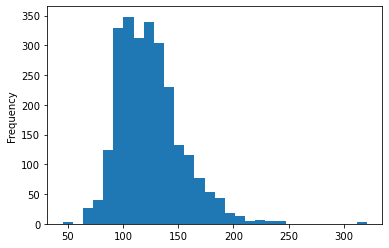

In [70]:
ax = movies.loc[:,'duration'].plot.hist(bins = 30)

<AxesSubplot:>

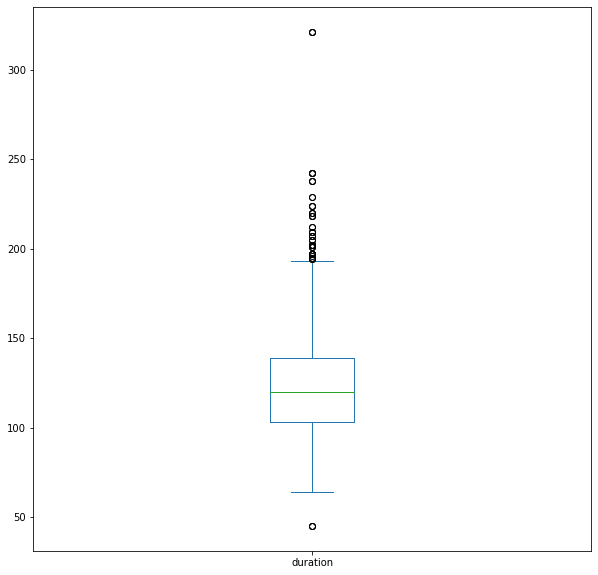

In [67]:
movies.duration.plot(kind="box" , figsize = (10,10))

In [66]:
# Checking how many movies are outliers

movies.describe()

,release_year,rating,gross(M),duration
count,2532.000000,2532.000000,2532.000000,2532.000000
mean,1992.241706,7.966272,61.718515,124.209716
std,24.221845,0.274463,113.378029,28.915958
min,1920.000000,7.600000,0.000000,45.000000
25%,1976.000000,7.800000,0.287500,103.000000
50%,2000.000000,7.900000,10.775000,120.000000
75%,2011.000000,8.100000,70.100000,139.000000
max,2023.000000,9.300000,936.660000,321.000000


In [71]:
movies[movies.duration > 200].title.value_counts().sum()

39

### Intermediate Level

### Counting different genres.

In [77]:
total = movies.genre.value_counts()

### Displaying that same data 

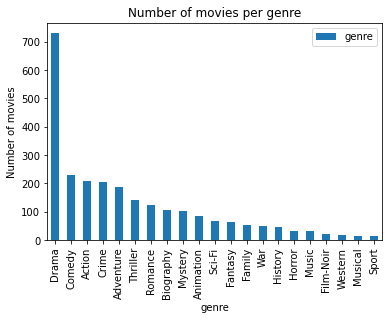

In [78]:
p = total.plot.bar()
p.set(title="Number of movies per genre",xlabel="genre", ylabel="Number of movies")
p.legend(loc="upper right");

### Count the number of missing values in each columns

In [79]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532 entries, 0 to 2531
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         2532 non-null   object 
 1   release_year  2532 non-null   int64  
 2   runtime       2532 non-null   object 
 3   genre         2532 non-null   object 
 4   rating        2532 non-null   float64
 5   gross(M)      2532 non-null   float64
 6   duration      2532 non-null   int32  
dtypes: float64(2), int32(1), int64(1), object(3)
memory usage: 128.7+ KB


In [80]:
movies.apply(pd.isnull).sum()

title           0
release_year    0
runtime         0
genre           0
rating          0
gross(M)        0
duration        0
dtype: int64

In [82]:
# OR
movies.isnull().sum()

title           0
release_year    0
runtime         0
genre           0
rating          0
gross(M)        0
duration        0
dtype: int64

### Calculate the average rating for the movies 2 hours or longer and compare that with the average rating for the movies shorter than 2 hours

In [86]:
avg_movie_rating_longer = movies[movies.loc[:,'duration'] >= 120].rating.mean()
avg_movie_rating_longer 

8.025076687116623

In [87]:
avg_movie_rating_shorter = movies[movies.loc[:,"duration"] < 120].rating.mean()
avg_movie_rating_shorter

7.9038273615635575

In [88]:
print(f"The average rating for the movies 2 hours or longer ({avg_movie_rating_longer}) greater than the average rating for the movies shorter than 2 hours which is {avg_movie_rating_shorter}")

The average rating for the movies 2 hours or longer (8.025076687116623) greater than the average rating for the movies shorter than 2 hours which is 7.9038273615635575


### Using visualization to detect whether there is a relationship between duration and rating

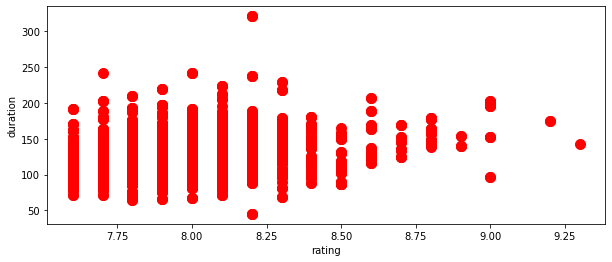

In [90]:
ax = movies.plot.scatter(x = "rating" ,
                         y ="duration" ,
                         figsize=(10,4), 
                         c= "red" ,
                         s=100)

##### The graph shows no pattern between points. Therefore, there is no correlation 

### Calculate the average duration for each genre

In [93]:
movies.groupby('genre')['duration'].mean().sort_values(ascending=False)

genre
History      142.955556
Musical      141.562500
Sport        140.133333
Biography    137.401869
War          133.460000
Action       130.545894
Western      130.058824
Drama        127.543092
Crime        126.039024
Adventure    125.687831
Mystery      122.718447
Romance      121.568000
Fantasy      121.564516
Sci-Fi       120.597015
Thriller     120.468085
Music        120.193548
Family       118.461538
Comedy       112.804348
Horror       102.060606
Film-Noir    101.590909
Animation     99.880952
Name: duration, dtype: float64

### Advanced Level

array([[<AxesSubplot:title={'center':'Action'}>,
        <AxesSubplot:title={'center':'Adventure'}>,
        <AxesSubplot:title={'center':'Animation'}>,
        <AxesSubplot:title={'center':'Biography'}>,
        <AxesSubplot:title={'center':'Comedy'}>],
       [<AxesSubplot:title={'center':'Crime'}>,
        <AxesSubplot:title={'center':'Drama'}>,
        <AxesSubplot:title={'center':'Family'}>,
        <AxesSubplot:title={'center':'Fantasy'}>,
        <AxesSubplot:title={'center':'Film-Noir'}>],
       [<AxesSubplot:title={'center':'History'}>,
        <AxesSubplot:title={'center':'Horror'}>,
        <AxesSubplot:title={'center':'Music'}>,
        <AxesSubplot:title={'center':'Musical'}>,
        <AxesSubplot:title={'center':'Mystery'}>],
       [<AxesSubplot:title={'center':'Romance'}>,
        <AxesSubplot:title={'center':'Sci-Fi'}>,
        <AxesSubplot:title={'center':'Sport'}>,
        <AxesSubplot:title={'center':'Thriller'}>,
        <AxesSubplot:title={'center':'War'}>],
    

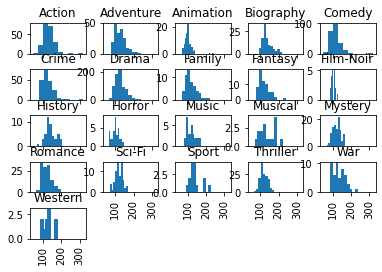

In [94]:
movies.loc[:,'duration'].hist(by=movies.loc[:,"genre"],sharex=True)

### Finding the title of the movie with the highest rating in each genre

In [97]:
movies.sort_values("rating" , ascending=False).groupby('genre').title.first().head(20)

genre
Action        The Lord of the Rings: The Return of the King
Adventure     The Lord of the Rings: The Return of the King
Animation               Spider-Man: Across the Spider-Verse
Biography                                  Schindler's List
Comedy                                          777 Charlie
Crime                                         The Godfather
Drama                              The Shawshank Redemption
Family                                It's a Wonderful Life
Fantasy      Star Wars: Episode V - The Empire Strikes Back
Film-Noir                                      Sunset Blvd.
History                                    Schindler's List
Horror                                               Psycho
Music                                           The Pianist
Musical                                 Singin' in the Rain
Mystery                                            Jai Bhim
Romance                                        Forrest Gump
Sci-Fi                            

### Check if there are multiple movies with the same title.


In [98]:
movies.head(15)

,title,release_year,runtime,genre,rating,gross(M),duration
0,The Shawshank Redemption,1994,142 min,Drama,9.3,28.34,142
1,The Godfather,1972,175 min,Crime,9.2,134.97,175
2,The Godfather,1972,175 min,Drama,9.2,134.97,175
3,The Dark Knight,2008,152 min,Action,9.0,534.86,152
4,The Dark Knight,2008,152 min,Crime,9.0,534.86,152
5,The Dark Knight,2008,152 min,Drama,9.0,534.86,152
6,Schindler's List,1993,195 min,Biography,9.0,96.90,195
7,Schindler's List,1993,195 min,Drama,9.0,96.90,195
8,Schindler's List,1993,195 min,History,9.0,96.90,195
9,12 Angry Men,1957,96 min,Crime,9.0,4.36,96


### Calculate the average rating for each genre, but only include genres with at least 10 movies

In [101]:
rating_genre = movies.groupby('genre').rating.agg(['count','mean'])
genre_rating = rating_genre["count"] >= 10

In [103]:
final_rating = rating_genre[genre_rating]

In [104]:
final_rating

,count,mean
genre,,
Action,207,7.986957
Adventure,189,7.983069
Animation,84,7.942857
Biography,107,7.971028
Comedy,230,7.910000
Crime,205,7.991707
Drama,731,7.980848
Family,52,7.932692
Fantasy,62,7.927419
